# Paying Ninja Warriors

Was thinking about how to compensate the Ninja Warrior athletes and came up with this pay scale. This is based on the current results from ANW Season 9, sourced here:  https://en.wikipedia.org/wiki/American_Ninja_Warrior_(season_9)

I wasn't quite sure where to get more complete data for the competitors, so currently the pay scale is based on only the top 30 competitors + women from the qualifiers, top 15 competitors + women in the city finals, and finishers in the Las Vegas National Finals

Here's a hypothetical pay structure, paid out by obstacle completed:

| 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 10   | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | ---  |
| \$20 | \$40 | \$60 | \$80 | \$100 | \$200 | \$250 | \$300 | \$350 | $800 |

Then the Las Vegas Nationals:

- Stage 1: \$1,000
- Stage 2: \$2,000
- Stage 3: \$3,000
- Stage 4: \$4,000

In [1]:
qual_purse = [20, 40, 60, 80, 100, 200]
finals_purse = qual_purse + [250, 300, 350, 800]

In [2]:
def purse_total(purse, finishers):
    """Total payout for a given city's competitors."""
    return sum([purse[idx - 1] for idx in finishers])

In [3]:
def calculate_totals(results, purse):
    """Calculate the per-city and grand total for a phase of competition."""
    running_total = 0
    for city in results:
        total = purse_total(purse, results[city])
        running_total += total
        print(f'-{city}: ${total}')
    print(f'-Total: ${running_total}')

In [4]:
qualifiers = {
    'Los Angeles': [6 for i in range(22)] + [5 for i in range(3)] + [4 for i in range(5)] + [4, 4, 4],
    'San Antonio': [6 for i in range(16)] + [4 for i in range(14)] + [3, 2, 2, 1],
    'Daytona': [6 for i in range(18)] + [4 for i in range(12)] + [4, 4, 2, 2],
    'Kansas City': [6 for i in range(10)] + [5, 5] + [4 for i in range(13)] + [3 for i in range(5)] + [3, 3, 3, 3, 3],
    'Cleveland': [6 for i in range(14)] + [5] + [4 for i in range(15)] + [3, 3, 3],
    'Denver': [6 for i in range(8)] + [4 for i in range(22)] + [3, 1]
}

In [5]:
calculate_totals(qualifiers, qual_purse)

-Los Angeles: $5340
-San Antonio: $4480
-Daytona: $4800
-Kansas City: $3840
-Cleveland: $4280
-Denver: $3440
-Total: $26180


In [6]:
finals = {
    'Los Angeles': [10, 10, 10, 10, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7] + [7, 5],
    'San Antonio': [10, 9, 9, 9, 8, 8] + [7 for i in range(9)] + [7, 5],
    'Daytona': [10, 9, 9, 9, 8, 8, 8, 8] + [7 for i in range(7)] + [4],
    'Kansas City': [9, 8] + [7 for i in range(7)] + [6, 6, 6, 6, 6, 4] + [4, 3],
    'Cleveland': [10, 10] + [7 for i in range(13)] + [7],
    'Denver': [10] + [8, 8] + [7 for i in range(12)] + [7, 4]
}

In [7]:
calculate_totals(finals, finals_purse)

-Los Angeles: $6700
-San Antonio: $5050
-Daytona: $4880
-Kansas City: $3620
-Cleveland: $5100
-Denver: $4730
-Total: $30080


As of Monday Sept 4, there were 20 finishers of Stage 1 of the Las Vegas finals, so that's 20 ppl x $1,000 per person = $20,000.

Projecting that there will be about as many finishers next week, that's roughly $40,000 paid out for Stage 1.

Last year, only 2 competitors finished Stage 2. 2ppl x $2,000 = $4,000.

Last year, no one finished Stage 3 (and by extension no one finished Stage 4)

In [8]:
26180 + 30080 + 40000 + 4000

100260

That's only **\$100,260**!

Now, according to https://en.wikipedia.org/wiki/American_Ninja_Warrior producers select 100 competitors for each qualifying round, plus 20-30 walk-ons. So the initial crop of, say, 130 ppl for each city gets culled down to 30 + 5 ppl. I wish I had the stats on who makes it to what obstacle, but let's be ambitious and say everyone makes it past the first obstacle.

Since we lose roughly 100 competitors per city for 6 cities, that's 600 ppl that make it past the first obstacle. That's another maybe $1,200 paid out. Still not much, barely an appreciable increase in the above total

## Obstacles Completed
Other interesting insights from this data: looking at payouts, Kansas City appears to have been the hardest course to beat. Let's look at the breakdown of how many finished each number of obstacles per city.

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

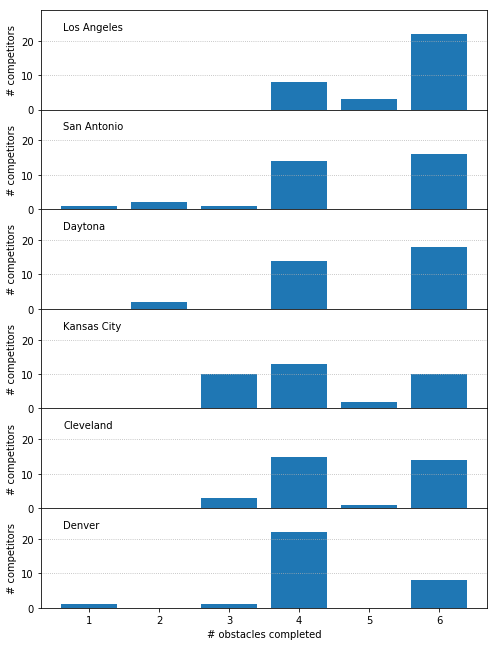

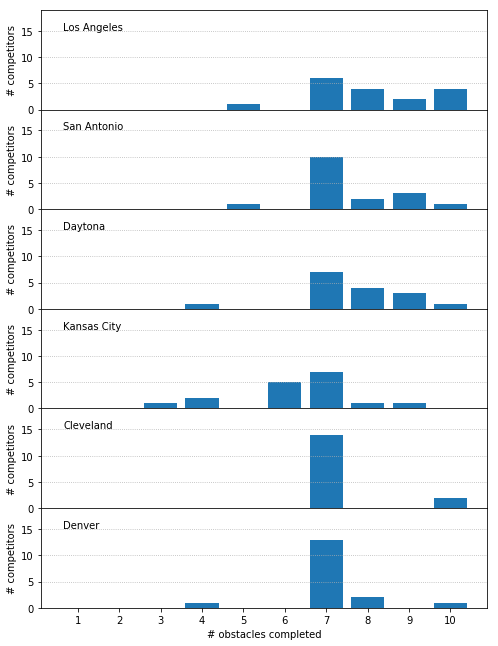

In [10]:
fig = plt.figure(figsize=(8, 11))
fig.subplots_adjust(hspace = 0)
city_names = list(qualifiers.keys())
for i in range(len(qualifiers)):
    counts = Counter(qualifiers[city_names[i]])
    ax = plt.subplot(len(qualifiers), 1, i + 1)
    ax.bar(range(1, 7), [counts[i] for i in range(1, 7)])
    ax.text(0.05, 0.8, city_names[i], transform=ax.transAxes)
    ax.set_ylim(0, 29)
    ax.set_ylabel('# competitors')
    ax.yaxis.grid(linestyle='dotted')
ax.set_xlabel('# obstacles completed')
plt.show()

fig = plt.figure(figsize=(8, 11))
fig.subplots_adjust(hspace = 0)
city_names = list(finals.keys())
for i in range(len(finals)):
    counts = Counter(finals[city_names[i]])
    ax = plt.subplot(len(finals), 1, i + 1)
    ax.bar(range(1, 11), [counts[i] for i in range(1, 11)])
    ax.text(0.05, 0.8, city_names[i], transform=ax.transAxes)
    ax.set_ylim(0, 19)
    ax.set_ylabel('# competitors')
    ax.set_xticks(range(1, 11))
    ax.yaxis.grid(linestyle='dotted')
ax.set_xlabel('# obstacles completed')
plt.show()

Interesting! The back half of Cleveland & Denver seem to be the hardest, while the front half of Kansas City & Denver seemed to give a fair bit of trouble.

In general though that seventh obstacle (the salmon ladder this season) seems to be what separates the casuals from the pros.